## Necessary Imports


In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import src.visualization as vis
import importlib
importlib.reload(vis)

<module 'src.visualization' from 'C:\\Users\\katko\\Documents\\GL3\\sem2\\PPP\\Duplicate-Question-Predictor\\src\\visualization.py'>

In [17]:
data = pd.read_csv('../../data/raw_data/clean_data.csv')

In [18]:
data

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
370389,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
370390,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
370391,404348,789796,789797,What is one coin?,What's this coin?,0
370392,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [19]:
data.describe()

,id,qid1,qid2,is_duplicate
count,370394.000000,370394.000000,370394.000000,370394.000000
mean,202064.104178,397431.429375,397421.700030,0.378375
std,116415.916778,227402.898592,227401.088845,0.484983
min,0.000000,1.000000,2.000000,0.000000
25%,101384.250000,201145.500000,201132.500000,0.000000
50%,201933.500000,398437.000000,398426.000000,0.000000
75%,302688.750000,594394.500000,594379.500000,1.000000
max,404350.000000,789800.000000,789801.000000,1.000000


In [20]:
sample = data.sample(100)

In [21]:
sample.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
173928,189711,374555,374556,How is the word 'temerity' used in a sentence?,How is the word 'bludgeon' used in a sentence?,0
254163,276871,544371,544372,What is the financial market?,What are financial markets?,1
302159,329419,646033,646034,What is agenda?,What is your agenda?,0
4079,4624,9244,9245,How can our life become interesting?,"When living alone, how can I make life more in...",1
147755,161157,318628,318629,Why is Sachin Tendulkar still a legend of cric...,Is Sachin Tendulkar the Messi of cricket?,0
37921,41927,83506,83507,Could The President pardon himself if he commi...,Can a US president pardon himself on his last ...,1
87637,95961,190488,190489,Currently we don't have any plan to raise reve...,I wanted to start up a business and I am looki...,0
243213,264806,520999,521000,Is it legal to question or criticize the actio...,Do Indian filmmaker have right /freedom to mak...,0
110702,121171,240125,240126,Why does my ex girlfriend call me whenever she...,Is it ok for my ex asking me to have a new gir...,0
268435,292476,574602,574603,What are some amazing bike inventions that exi...,What are some mind blowing bike tools that mos...,1


Duplicate pairs on training set: 37.84%
Number of distinct questions: 740705
Number of questions that appear multiple times: 76


Text(0, 0.5, 'Number of questions')

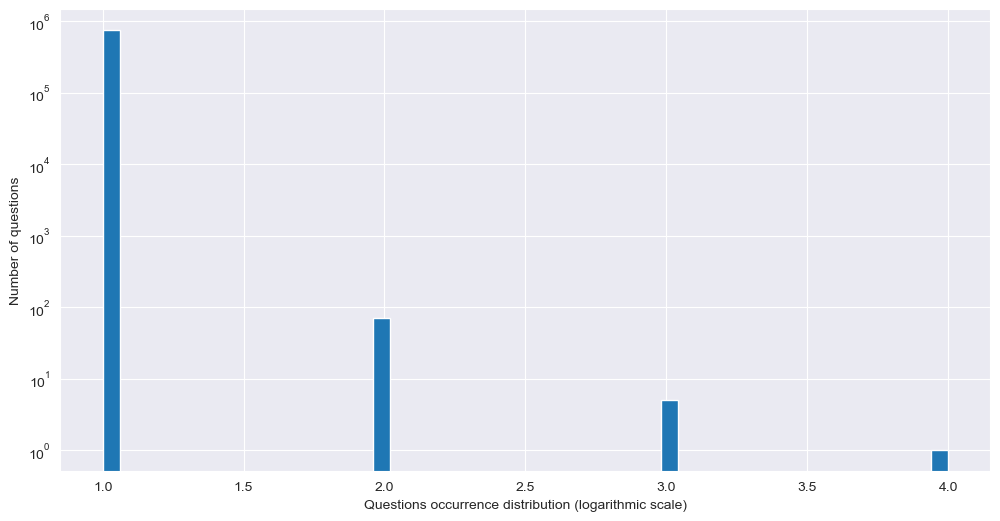

In [22]:
## Print some basic statistics
print('Duplicate pairs on training set: {}%'.format(round(data['is_duplicate'].mean()*100, 2)))

## count occurrences of identified questions on training set
qids = pd.Series(data[data['qid1'].notnull()]['qid1'].tolist() + data[data['qid2'].notnull()]['qid2'].tolist())
print('Number of distinct questions: {}'.format(len(np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

In [ ]:
# Plotting question occurrence distribution on a logarithmic scale
plt.figure(figsize=(12, 6))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log')

plt.xlabel('Questions occurrence distribution (logarithmic scale)')
plt.ylabel('Number of questions')

In [23]:
result = sample['is_duplicate']

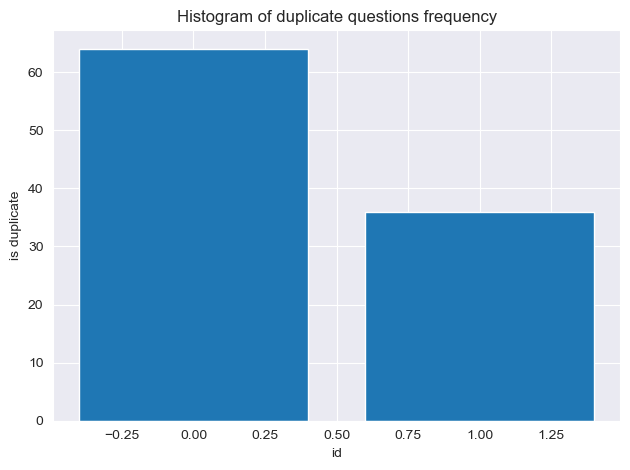

In [24]:
# Plotting Histogram of Duplicate Questions Frequency
fig, ax = plt.subplots()
ax.hist(result, bins=[-0.5, 0.5, 1.5], rwidth=0.8)
ax.set_xlabel('id')
ax.set_ylabel('is duplicate')
ax.set_title(r'Histogram of duplicate questions frequency')
fig.tight_layout()


plt.show()

In [25]:
 #vis.scatterMatrix(data[["is_duplicate"]])

In [26]:
# vis.correlationMatrix(data[["is_duplicate","length1","word_count1"]])

In [27]:
 #vis.scatterMatrix(data[["is_duplicate","length2","word_count2"]])

In [28]:
 #vis.correlationMatrix(data[["is_duplicate","length2","word_count2"]])